In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

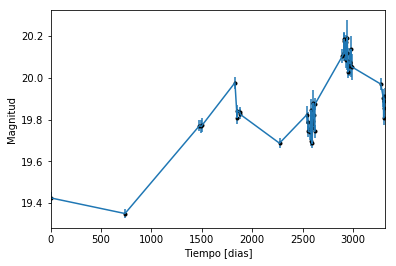

In [2]:
data = np.genfromtxt('LC_22611_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

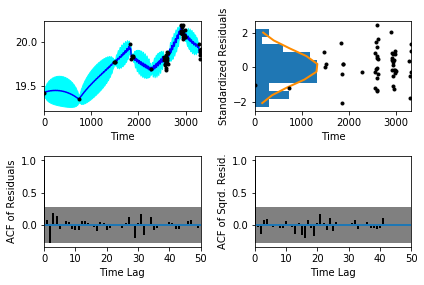

In [5]:
sample.assess_fit()

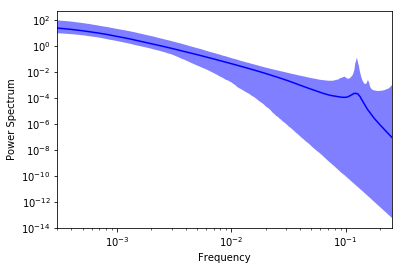

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.141055,'Medida del nivel de ruido')

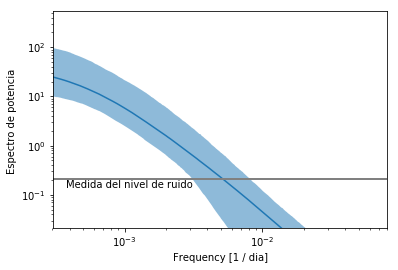

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

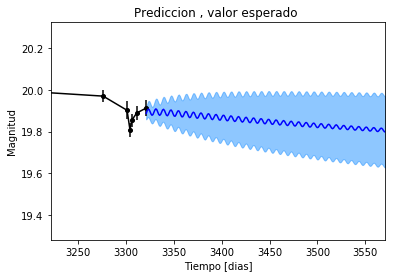

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

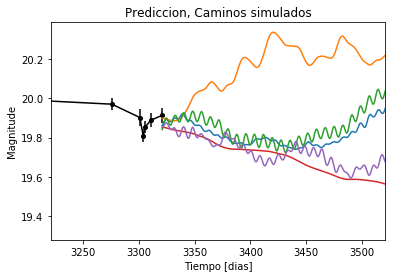

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


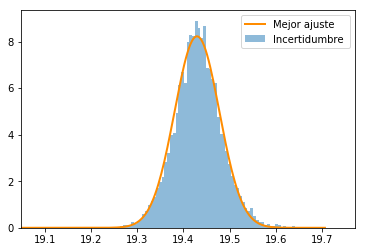

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

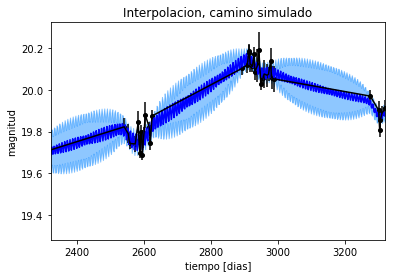

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

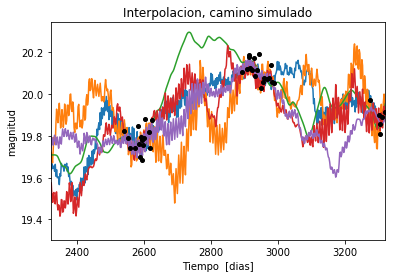

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1603.05314896
Median: 0.00189269243588
Standard deviation: 0.0777231988155
68% credibility interval: [ 0.00045744  0.03522012]
95% credibility interval: [  3.14140419e-04   3.20942981e-01]
99% credibility interval: [  3.01404555e-04   4.76501150e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 461.21723145
Median: 0.00128810292688
Standard deviation: 0.0343657752102
68% credibility interval: [ 0.00042414  0.01293745]
95% credibility interval: [ 0.00031169  0.10442017]
99% credibility interval: [ 0.0003014  0.2345264]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 346.273315386
Median: 0.027199787341
Standard deviation: 0

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 9762.9743041
Median: 81.3008111514
Standard deviation: 3.62398838986
68% credibility interval: [ 77.53893962  85.38294616]
95% credibility interval: [ 74.62898752  87.49114222]
99% credibility interval: [ 72.57644873  87.97480636]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 426.997517154
Median: 0.27594222151
Standard deviation: 1.00258961166
68% credibility interval: [ 0.09247933  1.67824024]
95% credibility interval: [ 0.02489413  3.49425812]
99% credibility interval: [ 0.01078268  4.82734534]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 210.802606785
Median: 0.640529518504
Standard deviation: 2.02697581035
68% credibility interval: [ 0.25426574  3.30315487]
95% credibility interval: [  7.93630419e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 1.01807838716e-36
Standard deviation: 1.18649041782e+121
68% credibility interval: [  9.56238083e-82   5.54165928e-13]
95% credibility interval: [  1.10102905e-92   1.31607954e+00]
99% credibility interval: [  8.67823874e-105   8.81008816e+000]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 971.148534351
Median: 19.709036724
Standard deviation: 0.113807222078
68% credibility interval: [ 19.59771805  19.81075375]
95% credibility interval: [ 19.4845898   19.92996108]
99% credibility interval: [ 19.39536152  20.03148349]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 209.48304718
Median: 0.125080392779
Standard deviation: 0.109429331498
68% credibility interval: [ 0.00544595  0.27495875]
95% credibility interval: [ 0.          0.42555689]
99% credibility interval: [ 0.          0.50445121]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 209.48304718
Median: 0.125080392779
Standard deviation: 0.109429331498
68% credibility interval: [ 0.00544595  0.27495875]
95% credibility interval: [ 0.          0.42555689]
99% credibility interval: [ 0.          0.50445121]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 15250.3598538
Median: 0.0
Standard deviation: 0.000209242599353
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 9762.9743041
Median: 81.3008111514
Standard deviation: 3.62398838986
68% credibility interval: [ 77.53893962  85.38294616]
95% credibility interval: [ 74.62898752  87.49114222]
99% credibility interval: [ 72.57644873  87.97480636]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 464.870965513
Median: 0.0510363328849
Standard deviation: 0.0449262053955
68% credibility interval: [ 0.0339993   0.08465263]
95% credibility interval: [ 0.02426108  0.17122413]
99% credibility interval: [ 0.02019687  0.32505668]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 203.861387707
Median: 1.06814909232
Standard deviation: 0.239596829907
68% credibility interval: [ 0.87083311  1.34872794]
95% credibility interval: [ 0.72747299  1.64417798]
99% credibility interval: [ 0.67369018  1.82833873]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 236.226306374
Median: 0.00150948519502
Standard deviation: 0.0316404740075
68% credibility interval: [ 0.00017931  0.01248684]
95% credibility interval: [  1.70736435e-06   9.68149870e-02]
99% credibility interval: [  1.72262124e-07   1.99150524e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1603.05314896
Median: (-0.0118921373041-0.875225190374j)
Standard deviation: 0.843344716307
68% credibility interval: [-0.22129453+0.j         -0.00287419-0.77609978j]
95% credibility interval: [ -2.01654422e+00-0.63083111j  -1.97380247e-03-0.80495302j]
99% credibility interval: [ -2.99394502e+00+0.j          -1.89378067e-03-0.77991548j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 461.21723145
Median: (-0.00809338938428+0.921739812033j)
Standard deviation: 0.720673003522
68% credibility interval: [-0.08128838+0.95306214j -0.00266496+0.j        ]
95% credibility interval: [-0.65609129+2.7981408j  -0.00195842+0.97371563j]
99% credibility interval: [-1.47357281+1.30200147j -0.00189378+0.77991548j]
Posterior summary fo